In [141]:
# change woring directory %%%
import os
cwd = os.getcwd()
print('Current Working Directory is: ', cwd)
absolute_path = "C:/Users/toluw/Downloads/Assignment 3350"
os.chdir(absolute_path)
print('New working directory is: ', os.getcwd())

Current Working Directory is:  C:\Users\toluw\Downloads\Assignment 3350
New working directory is:  C:\Users\toluw\Downloads\Assignment 3350


In [142]:
import pandas as pd
import numpy as np

In [143]:
# import required modules
import pandas as pd
import numpy as np
import time
import seaborn as sns

# time taken to read data
s_time_chunk = time.time()
chunk = pd.read_csv('Assessment_Data_.csv', chunksize=1000)
e_time_chunk = time.time()

print("With chunks: ", (e_time_chunk-s_time_chunk), "sec")
df = pd.concat(chunk)

# data
df.sample(5)

With chunks:  0.004003763198852539 sec


,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
2639771,10284340,2021,NaN,1811.0,28 STREET NW,Plan: 1220676 Block: 12 Lot: 19,53.44794,-113.38259,POINT (-113.38259 53.44794),LAUREL,...,Y,RF4,287.890,303500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
3324693,1283241,2013,172.0,2703.0,79 STREET NW,Plan: 8320181 Unit: 52,53.45781,-113.45253,POINT (-113.45253 53.45781),MEYONOHK,...,N,RF6,219.924,163000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
1755761,10012364,2019,NaN,210.0,EDWARDS DRIVE SW,Plan: 0325189 Block: 7 Lot: 98,53.42970,-113.46124,POINT (-113.46124 53.4297),ELLERSLIE,...,Y,RSL,512.366,417000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
3447437,1906221,2017,NaN,18108.0,68 AVENUE NW,Plan: 2975TR Block: 17 Lot: 49,53.50250,-113.63514,POINT (-113.63514 53.5025),ORMSBY PLACE,...,Y,RF1,720.350,349500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
1004044,8381402,2020,NaN,8919.0,89 STREET NW,Plan: 6080R Block: 3 Lot: 2,53.52492,-113.46341,POINT (-113.46341 53.52492),BONNIE DOON,...,Y,RF3,367.279,824500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN


In [144]:
# keep only the latest assessment date of property
df2 = df.sort_values("Assessment Year", ascending = False).drop_duplicates(subset=["Account Number"], keep="first").reset_index(drop=True)

In [145]:
# The data has no missing values.
# count of null values in each column. I will show columnms with missing values
print(df2.isnull().sum())

Account Number               0
Assessment Year              0
Suite                   339414
House Number             46704
Street Name              46704
Legal Description         6090
Latitude                  4297
Longitude                 4297
Point Location            4297
Neighbourhood                0
Actual Year Built        22444
Garage                       0
Zoning                      40
Lot Size                  3217
Assessed Value               0
Assessment Class 1         349
Assessment Class % 1       349
Assessment Class 2      421895
Assessment Class % 2    421895
Assessment Class 3      422808
Assessment Class % 3    422808
dtype: int64


In [146]:
df2.drop(columns=['Suite','House Number','Street Name','Legal Description','Point Location',], inplace=True)

In [147]:
df2.drop(columns=['Assessment Class % 1', 'Assessment Class 2','Assessment Class % 2','Assessment Class 3','Assessment Class % 3'], inplace=True)

In [148]:
df2.head()

,Account Number,Assessment Year,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1
0,10411450,2021,53.42788,-113.62388,WINDERMERE,2014.0,Y,UCRH,331.985,331000.0,RESIDENTIAL
1,10924166,2021,53.41060,-113.42418,WALKER,2020.0,Y,RSL,378.065,467000.0,RESIDENTIAL
2,10156070,2021,53.61436,-113.38706,KIRKNESS,2010.0,Y,RSL,343.076,359000.0,RESIDENTIAL
3,7950157,2021,53.49645,-113.58263,BRANDER GARDENS,1974.0,Y,RF5,273.558,304000.0,RESIDENTIAL
4,10925050,2021,53.39725,-113.60199,CHAPPELLE AREA,2019.0,Y,RMD,367.055,450500.0,RESIDENTIAL


In [149]:
df2['Assessment Year'].value_counts()

2021    413809
2018      1463
2016      1201
2017      1151
2015      1002
2014       998
2012       976
2020       891
2019       873
2013       750
Name: Assessment Year, dtype: int64

In [150]:
df2 = df2.dropna()


In [151]:
# The data has no missing values.
# count of null values in each column. I will show columnms with missing values
print(df2.isnull().sum())

Account Number        0
Assessment Year       0
Latitude              0
Longitude             0
Neighbourhood         0
Actual Year Built     0
Garage                0
Zoning                0
Lot Size              0
Assessed Value        0
Assessment Class 1    0
dtype: int64


In [152]:
df2.describe()

,Account Number,Assessment Year,Latitude,Longitude,Actual Year Built,Lot Size,Assessed Value
count,3.933300e+05,393330.000000,393330.000000,393330.000000,393330.000000,3.933300e+05,3.933300e+05
mean,7.719185e+06,2020.933285,53.519207,-113.511963,1989.921702,9.468675e+02,4.706777e+05
std,3.261247e+06,0.632598,0.067258,0.080720,22.647621,1.219107e+04,3.684607e+06
min,1.001163e+06,2012.000000,53.338590,-113.713000,1881.000000,0.000000e+00,0.000000e+00
25%,4.264200e+06,2021.000000,53.460440,-113.566640,1974.000000,1.146540e+02,1.830000e+05
50%,9.950290e+06,2021.000000,53.521420,-113.509720,1996.000000,3.780450e+02,3.150000e+05
75%,1.015618e+07,2021.000000,53.572560,-113.449530,2009.000000,5.710050e+02,4.135000e+05
max,1.103101e+07,2021.000000,53.715150,-113.281240,2021.000000,1.465717e+06,9.756095e+08


In [153]:
df2 = df2[df2["Assessed Value"] > 100000]

In [154]:
df2['Assessment Class 1'].value_counts()

RESIDENTIAL                       323264
COMMERCIAL                         12901
OTHER RESIDENTIAL                   3168
FARMLAND                              10
NONRES MUNICIPAL/RES EDUCATION         3
DESIGNATED IND PROPERTIES              1
Name: Assessment Class 1, dtype: int64

In [155]:
df2.sample(100)

,Account Number,Assessment Year,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1
313541,3890050,2021,53.61742,-113.55326,OXFORD,1994.0,Y,RF1,851.235,450500.0,RESIDENTIAL
406641,10036928,2021,53.42608,-113.53681,MACEWAN,2006.0,Y,RSL,511.565,450000.0,RESIDENTIAL
308750,2702736,2021,53.54979,-113.53289,WESTMOUNT,1978.0,N,RA8,919.710,1813000.0,OTHER RESIDENTIAL
111731,10090820,2021,53.44889,-113.59437,HADDOW,2006.0,Y,RF6,166.370,197000.0,RESIDENTIAL
399595,3742004,2021,53.55816,-113.48768,MCCAULEY,1934.0,Y,DC1,375.039,188500.0,RESIDENTIAL
...,...,...,...,...,...,...,...,...,...,...,...
310776,2682318,2021,53.55501,-113.55389,NORTH GLENORA,1952.0,Y,RF1,512.758,357000.0,RESIDENTIAL
420086,10411107,2015,53.44286,-113.61578,WINDERMERE,2013.0,Y,RF4,300.307,428000.0,RESIDENTIAL
234750,5518592,2021,53.60888,-113.37545,FRASER,1980.0,N,RF4,343.699,237500.0,RESIDENTIAL
153888,10404304,2021,53.39821,-113.51725,ALLARD,2015.0,Y,RSL,624.692,775000.0,RESIDENTIAL


In [156]:
# count of each unique value in the "Assessment Class 1" column
print(df2['Assessment Class 1'].value_counts())

RESIDENTIAL                       323264
COMMERCIAL                         12901
OTHER RESIDENTIAL                   3168
FARMLAND                              10
NONRES MUNICIPAL/RES EDUCATION         3
DESIGNATED IND PROPERTIES              1
Name: Assessment Class 1, dtype: int64


In [157]:
df2.sample(10)

,Account Number,Assessment Year,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1
194433,10855650,2021,53.40365,-113.52731,CALLAGHAN,2015.0,Y,RA7,160.015,234500.0,RESIDENTIAL
72067,1191808,2021,53.63678,-113.48542,LAGO LINDO,1983.0,Y,RF1,401.396,311000.0,RESIDENTIAL
226889,10789697,2021,53.61762,-113.56144,CARLTON,2016.0,N,RA7,77.841,206500.0,RESIDENTIAL
193498,10224823,2021,53.43157,-113.61819,WINDERMERE,2011.0,Y,RSL,400.534,565000.0,RESIDENTIAL
171462,6555403,2021,53.58662,-113.42715,KENNEDALE INDUSTRIAL,1930.0,N,IM,754.000,155500.0,RESIDENTIAL
217074,10854307,2021,53.43842,-113.56134,MACTAGGART,2017.0,N,DC2,90.362,649500.0,RESIDENTIAL
218861,7659113,2021,53.48857,-113.51355,PLEASANTVIEW,1962.0,Y,RF4,326.080,278500.0,RESIDENTIAL
136939,6361828,2021,53.59282,-113.48380,GLENGARRY,1961.0,Y,RF1,530.001,289500.0,RESIDENTIAL
200343,10865552,2021,53.50385,-113.38644,SOUTHEAST (ANNEXED) INDUSTRIAL,2004.0,N,IM,31058.354,3138000.0,COMMERCIAL
304157,2684553,2021,53.55346,-113.55336,NORTH GLENORA,1952.0,Y,RF1,669.075,492000.0,RESIDENTIAL


In [158]:
df2.dtypes

Account Number          int64
Assessment Year         int64
Latitude              float64
Longitude             float64
Neighbourhood          object
Actual Year Built     float64
Garage                 object
Zoning                 object
Lot Size              float64
Assessed Value        float64
Assessment Class 1     object
dtype: object

In [159]:
df2['Actual Year Built'] = df2['Actual Year Built'].apply(np.int64)

In [160]:
df2.dtypes

Account Number          int64
Assessment Year         int64
Latitude              float64
Longitude             float64
Neighbourhood          object
Actual Year Built       int64
Garage                 object
Zoning                 object
Lot Size              float64
Assessed Value        float64
Assessment Class 1     object
dtype: object

In [161]:
df2 = df2[df2["Assessed Value"] < 1000000]

In [162]:
df2.describe()

,Account Number,Assessment Year,Latitude,Longitude,Actual Year Built,Lot Size,Assessed Value
count,3.263410e+05,326341.000000,326341.000000,326341.000000,326341.000000,3.263410e+05,326341.00000
mean,7.551263e+06,2020.960532,53.519366,-113.510647,1988.533013,6.327590e+02,348318.12175
std,3.263744e+06,0.490398,0.068700,0.082636,23.150608,8.762712e+03,149281.38155
min,1.001601e+06,2012.000000,53.338590,-113.713000,1881.000000,0.000000e+00,100500.00000
25%,4.222808e+06,2021.000000,53.460160,-113.567730,1972.000000,2.566270e+02,249000.00000
50%,9.384504e+06,2021.000000,53.519280,-113.507300,1992.000000,4.109040e+02,333000.00000
75%,1.012339e+07,2021.000000,53.577030,-113.445000,2008.000000,5.771570e+02,419000.00000
max,1.103101e+07,2021.000000,53.715150,-113.281240,2021.000000,1.278221e+06,999500.00000


In [163]:
df2 =  df2[(df2["Lot Size"] >=5) & (df2["Lot Size"] < 1000)]

In [164]:
df2.describe()

,Account Number,Assessment Year,Latitude,Longitude,Actual Year Built,Lot Size,Assessed Value
count,3.200840e+05,320084.000000,320084.000000,320084.000000,320084.000000,320084.000000,320084.000000
mean,7.578676e+06,2020.963475,53.519310,-113.510478,1988.698676,407.245375,343719.343672
std,3.253779e+06,0.470172,0.068728,0.082430,23.193588,217.586061,143729.915360
min,1.003904e+06,2012.000000,53.340190,-113.713000,1900.000000,5.009000,100500.000000
25%,4.234940e+06,2021.000000,53.459790,-113.567120,1973.000000,254.903000,247500.000000
50%,9.412201e+06,2021.000000,53.519330,-113.507070,1992.000000,405.554000,331000.000000
75%,1.012486e+07,2021.000000,53.577163,-113.444930,2009.000000,569.447250,414000.000000
max,1.103101e+07,2021.000000,53.645560,-113.319380,2021.000000,999.947000,999500.000000


In [165]:

df2.to_csv('Assessment2.csv',index=False)

In [166]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
street_map = gpd.read_file('geo_export_68a1a97b-4ca2-4b22-b7b5-a43777040f48.shp')

In [167]:
df_ZNei = df2.groupby(['Zoning','Neighbourhood']).agg({'Assessed Value': ['count','mean','median', 'min', 'max']})

In [168]:
df_ZNei.sample(10)


Assessed Value                                     \
                                   count           mean    median       min   
Zoning Neighbourhood                                                          
RF6    AMBLESIDE                      48  681635.416667  676750.0  618000.0   
CB2    BEVERLY HEIGHTS                 9  311388.888889  287500.0  177000.0   
DC2    GLENRIDDING RAVINE             23  314608.695652  314000.0  307000.0   
RA7    MENISA                         14  118178.571429  118500.0  114000.0   
       KILLARNEY                      14  607964.285714  593250.0  563500.0   
RSL    HOLLICK-KENYON                535  387987.850467  384000.0  303500.0   
RA9    ERMINESKIN                    212  274716.981132  302500.0  100500.0   
RSL    HODGSON                       519  586006.743738  530000.0  404500.0   
RF5    KEHEEWIN                      127  200342.519685  200000.0  190500.0   
       CANOSSA                        83  247054.216867  238000.0  222000.0   

                                     
                                max  
Zoning Neighbourhood                 
RF6    AMBLESIDE           789500.0  
CB2    BEVERLY HEIGHTS     611500.0  
DC2    GLENRIDDING RAVINE  333000.0  
RA7    MENISA              123000.0  
       KILLARNEY           696500.0  
RSL    HOLLICK-KENYON      707000.0  
RA9    ERMINESKIN          636000.0  
RSL    HODGSON             983500.0  
RF5    KEHEEWIN            221500.0  
       CANOSSA             303000.0

In [169]:
df2.describe()

,Account Number,Assessment Year,Latitude,Longitude,Actual Year Built,Lot Size,Assessed Value
count,3.200840e+05,320084.000000,320084.000000,320084.000000,320084.000000,320084.000000,320084.000000
mean,7.578676e+06,2020.963475,53.519310,-113.510478,1988.698676,407.245375,343719.343672
std,3.253779e+06,0.470172,0.068728,0.082430,23.193588,217.586061,143729.915360
min,1.003904e+06,2012.000000,53.340190,-113.713000,1900.000000,5.009000,100500.000000
25%,4.234940e+06,2021.000000,53.459790,-113.567120,1973.000000,254.903000,247500.000000
50%,9.412201e+06,2021.000000,53.519330,-113.507070,1992.000000,405.554000,331000.000000
75%,1.012486e+07,2021.000000,53.577163,-113.444930,2009.000000,569.447250,414000.000000
max,1.103101e+07,2021.000000,53.645560,-113.319380,2021.000000,999.947000,999500.000000


In [170]:
dfprop = df2

In [171]:
dfprop.describe()

,Account Number,Assessment Year,Latitude,Longitude,Actual Year Built,Lot Size,Assessed Value
count,3.200840e+05,320084.000000,320084.000000,320084.000000,320084.000000,320084.000000,320084.000000
mean,7.578676e+06,2020.963475,53.519310,-113.510478,1988.698676,407.245375,343719.343672
std,3.253779e+06,0.470172,0.068728,0.082430,23.193588,217.586061,143729.915360
min,1.003904e+06,2012.000000,53.340190,-113.713000,1900.000000,5.009000,100500.000000
25%,4.234940e+06,2021.000000,53.459790,-113.567120,1973.000000,254.903000,247500.000000
50%,9.412201e+06,2021.000000,53.519330,-113.507070,1992.000000,405.554000,331000.000000
75%,1.012486e+07,2021.000000,53.577163,-113.444930,2009.000000,569.447250,414000.000000
max,1.103101e+07,2021.000000,53.645560,-113.319380,2021.000000,999.947000,999500.000000


In [172]:
# designate coordinate system
crs2 = {'init': 'epsg:4326'}
# zip x and y coordinates into single feature
geometry2 = [Point(xy) for xy in zip(dfprop['Longitude'], dfprop['Latitude'])]
# create GeoPandas dataframe
geo_df2 = gpd.GeoDataFrame(dfprop, crs = crs2, geometry = geometry2)

c:\Users\toluw\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


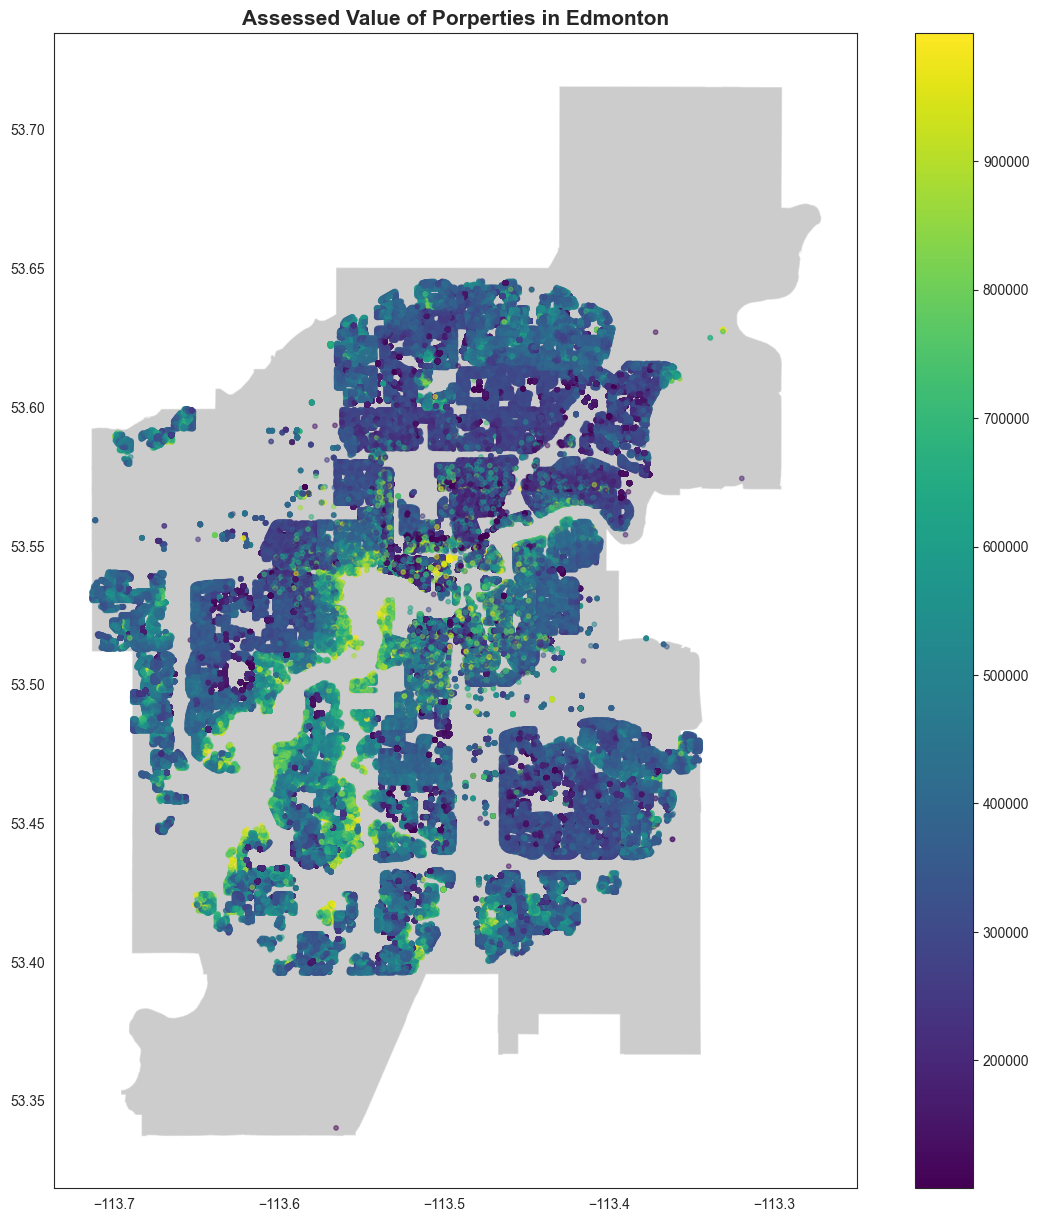

In [173]:
# create figure and axes, assign to subplot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df2.plot(column='Assessed Value',ax=ax,alpha=0.5, legend=True,markersize=10,cmap="viridis")
# add title to graph
plt.title('Assessed Value of Porperties in Edmonton', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display

# show map
plt.savefig("EDM.png")
plt.show()

In [174]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

In [175]:
dfprop = dfprop[dfprop["Assessment Class 1"] =='RESIDENTIAL']

In [176]:
dfprop .head()

,Account Number,Assessment Year,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,geometry
0,10411450,2021,53.42788,-113.62388,WINDERMERE,2014,Y,UCRH,331.985,331000.0,RESIDENTIAL,POINT (-113.62388 53.42788)
1,10924166,2021,53.41060,-113.42418,WALKER,2020,Y,RSL,378.065,467000.0,RESIDENTIAL,POINT (-113.42418 53.41060)
2,10156070,2021,53.61436,-113.38706,KIRKNESS,2010,Y,RSL,343.076,359000.0,RESIDENTIAL,POINT (-113.38706 53.61436)
3,7950157,2021,53.49645,-113.58263,BRANDER GARDENS,1974,Y,RF5,273.558,304000.0,RESIDENTIAL,POINT (-113.58263 53.49645)
4,10925050,2021,53.39725,-113.60199,CHAPPELLE AREA,2019,Y,RMD,367.055,450500.0,RESIDENTIAL,POINT (-113.60199 53.39725)


In [177]:
dfprop["Current_Year"]= 2022 

C:\Users\toluw\AppData\Local\Temp\ipykernel_26628\3459115255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfprop["Current_Year"]= 2022


In [178]:
dfprop .head()

,Account Number,Assessment Year,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,geometry,Current_Year
0,10411450,2021,53.42788,-113.62388,WINDERMERE,2014,Y,UCRH,331.985,331000.0,RESIDENTIAL,POINT (-113.62388 53.42788),2022
1,10924166,2021,53.41060,-113.42418,WALKER,2020,Y,RSL,378.065,467000.0,RESIDENTIAL,POINT (-113.42418 53.41060),2022
2,10156070,2021,53.61436,-113.38706,KIRKNESS,2010,Y,RSL,343.076,359000.0,RESIDENTIAL,POINT (-113.38706 53.61436),2022
3,7950157,2021,53.49645,-113.58263,BRANDER GARDENS,1974,Y,RF5,273.558,304000.0,RESIDENTIAL,POINT (-113.58263 53.49645),2022
4,10925050,2021,53.39725,-113.60199,CHAPPELLE AREA,2019,Y,RMD,367.055,450500.0,RESIDENTIAL,POINT (-113.60199 53.39725),2022


In [179]:
dfprop['Age_Property'] = dfprop['Current_Year']- dfprop['Actual Year Built']

C:\Users\toluw\AppData\Local\Temp\ipykernel_26628\2778642150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfprop['Age_Property'] = dfprop['Current_Year']- dfprop['Actual Year Built']


In [180]:
dfprop.head()

,Account Number,Assessment Year,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,geometry,Current_Year,Age_Property
0,10411450,2021,53.42788,-113.62388,WINDERMERE,2014,Y,UCRH,331.985,331000.0,RESIDENTIAL,POINT (-113.62388 53.42788),2022,8
1,10924166,2021,53.41060,-113.42418,WALKER,2020,Y,RSL,378.065,467000.0,RESIDENTIAL,POINT (-113.42418 53.41060),2022,2
2,10156070,2021,53.61436,-113.38706,KIRKNESS,2010,Y,RSL,343.076,359000.0,RESIDENTIAL,POINT (-113.38706 53.61436),2022,12
3,7950157,2021,53.49645,-113.58263,BRANDER GARDENS,1974,Y,RF5,273.558,304000.0,RESIDENTIAL,POINT (-113.58263 53.49645),2022,48
4,10925050,2021,53.39725,-113.60199,CHAPPELLE AREA,2019,Y,RMD,367.055,450500.0,RESIDENTIAL,POINT (-113.60199 53.39725),2022,3


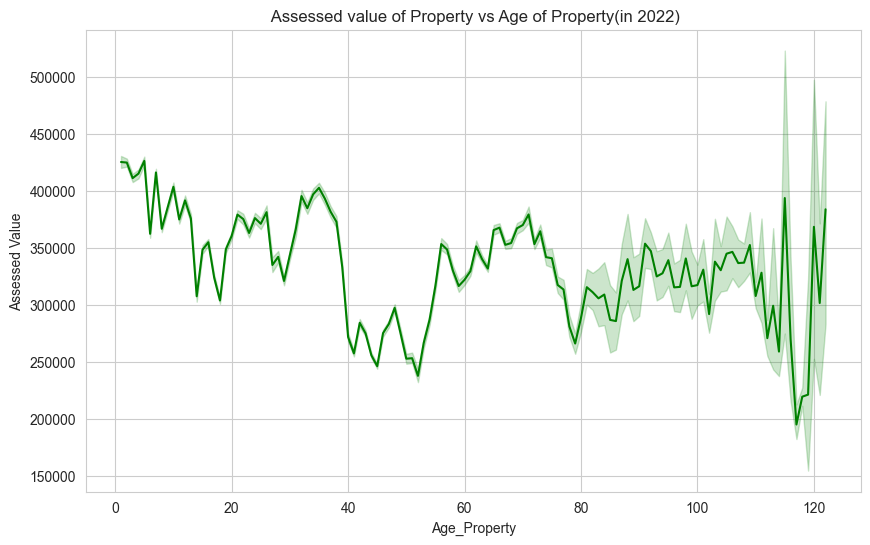

In [209]:
sns.set_style("whitegrid")
sns.lineplot(x=dfprop["Age_Property"],y=dfprop["Assessed Value"],color="g")
plt.title(" Assessed value of Property vs Age of Property(in 2022)")
plt.gcf().set_size_inches(10,6)
plt.savefig("Chart.png")

In [182]:
dfnw = pd.read_csv('ward.csv')

In [183]:
dfpropw= dfprop.merge(dfnw, how='left')

In [184]:
dfpropw.head()

,Account Number,Assessment Year,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,geometry,Current_Year,Age_Property,Ward,Neighbourhood ID
0,10411450,2021,53.42788,-113.62388,WINDERMERE,2014,Y,UCRH,331.985,331000.0,RESIDENTIAL,POINT (-113.62388 53.42788),2022,8,Ward 9,5570.0
1,10924166,2021,53.41060,-113.42418,WALKER,2020,Y,RSL,378.065,467000.0,RESIDENTIAL,POINT (-113.42418 53.41060),2022,2,Ward 12,6662.0
2,10156070,2021,53.61436,-113.38706,KIRKNESS,2010,Y,RSL,343.076,359000.0,RESIDENTIAL,POINT (-113.38706 53.61436),2022,12,Ward 4,2430.0
3,7950157,2021,53.49645,-113.58263,BRANDER GARDENS,1974,Y,RF5,273.558,304000.0,RESIDENTIAL,POINT (-113.58263 53.49645),2022,48,Ward 9,5080.0
4,10925050,2021,53.39725,-113.60199,CHAPPELLE AREA,2019,Y,RMD,367.055,450500.0,RESIDENTIAL,POINT (-113.60199 53.39725),2022,3,Ward 9,5462.0


In [185]:
print(dfpropw.isnull().sum())

Account Number           0
Assessment Year          0
Latitude                 0
Longitude                0
Neighbourhood            0
Actual Year Built        0
Garage                   0
Zoning                   0
Lot Size                 0
Assessed Value           0
Assessment Class 1       0
geometry                 0
Current_Year             0
Age_Property             0
Ward                  2572
Neighbourhood ID      2572
dtype: int64


In [186]:
dfpropw_2 = dfpropw.dropna()

In [187]:
dfpropw_2.head()

,Account Number,Assessment Year,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,geometry,Current_Year,Age_Property,Ward,Neighbourhood ID
0,10411450,2021,53.42788,-113.62388,WINDERMERE,2014,Y,UCRH,331.985,331000.0,RESIDENTIAL,POINT (-113.62388 53.42788),2022,8,Ward 9,5570.0
1,10924166,2021,53.41060,-113.42418,WALKER,2020,Y,RSL,378.065,467000.0,RESIDENTIAL,POINT (-113.42418 53.41060),2022,2,Ward 12,6662.0
2,10156070,2021,53.61436,-113.38706,KIRKNESS,2010,Y,RSL,343.076,359000.0,RESIDENTIAL,POINT (-113.38706 53.61436),2022,12,Ward 4,2430.0
3,7950157,2021,53.49645,-113.58263,BRANDER GARDENS,1974,Y,RF5,273.558,304000.0,RESIDENTIAL,POINT (-113.58263 53.49645),2022,48,Ward 9,5080.0
4,10925050,2021,53.39725,-113.60199,CHAPPELLE AREA,2019,Y,RMD,367.055,450500.0,RESIDENTIAL,POINT (-113.60199 53.39725),2022,3,Ward 9,5462.0


# Prediction 

In [188]:
import statsmodels.formula.api as smf

In [189]:
dfpropw3 = dfpropw_2

In [190]:
dfpropw3.head()

,Account Number,Assessment Year,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,geometry,Current_Year,Age_Property,Ward,Neighbourhood ID
0,10411450,2021,53.42788,-113.62388,WINDERMERE,2014,Y,UCRH,331.985,331000.0,RESIDENTIAL,POINT (-113.62388 53.42788),2022,8,Ward 9,5570.0
1,10924166,2021,53.41060,-113.42418,WALKER,2020,Y,RSL,378.065,467000.0,RESIDENTIAL,POINT (-113.42418 53.41060),2022,2,Ward 12,6662.0
2,10156070,2021,53.61436,-113.38706,KIRKNESS,2010,Y,RSL,343.076,359000.0,RESIDENTIAL,POINT (-113.38706 53.61436),2022,12,Ward 4,2430.0
3,7950157,2021,53.49645,-113.58263,BRANDER GARDENS,1974,Y,RF5,273.558,304000.0,RESIDENTIAL,POINT (-113.58263 53.49645),2022,48,Ward 9,5080.0
4,10925050,2021,53.39725,-113.60199,CHAPPELLE AREA,2019,Y,RMD,367.055,450500.0,RESIDENTIAL,POINT (-113.60199 53.39725),2022,3,Ward 9,5462.0


In [191]:
dfpropw3.to_csv('data1.csv',index=False)

In [192]:
dfpropw3.tail(5)

,Account Number,Assessment Year,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,geometry,Current_Year,Age_Property,Ward,Neighbourhood ID
312101,4033064,2021,53.46914,-113.57283,BULYEA HEIGHTS,1989,Y,RF1,559.330,484500.0,RESIDENTIAL,POINT (-113.57283 53.46914),2022,33,Ward 9,5100.0
312102,3198132,2021,53.44280,-113.49856,BEARSPAW,1987,Y,RF5,439.164,211500.0,RESIDENTIAL,POINT (-113.49856 53.44280),2022,35,Ward 10,5030.0
312103,10060237,2021,53.41252,-113.53964,RUTHERFORD,2007,Y,RSL,468.393,435000.0,RESIDENTIAL,POINT (-113.53964 53.41252),2022,15,Ward 9,5454.0
312104,9324609,2021,53.45243,-113.46037,MEYONOHK,1977,Y,RF1,970.554,326000.0,RESIDENTIAL,POINT (-113.46037 53.45243),2022,45,Ward 11,6470.0
312105,4114898,2021,53.54803,-113.54070,WESTMOUNT,1989,Y,RF3,325.035,377000.0,RESIDENTIAL,POINT (-113.54070 53.54803),2022,33,Ward 6,3440.0


In [193]:
dfpropw3.Zoning.value_counts()

RF1    108355
RSL     41385
RA7     31853
RF5     24650
RF4     18761
        ...  
AG          5
IH          4
AGI         2
UI          1
A           1
Name: Zoning, Length: 71, dtype: int64

In [194]:
# Dropping zoning with less than 1,000 properties
dfpropw4=dfpropw3[dfpropw3.groupby('Zoning')['Zoning'].transform('count')>1000].copy()

In [195]:
dfpropw4.Zoning.value_counts()

RF1    108355
RSL     41385
RA7     31853
RF5     24650
RF4     18761
RF3     18156
RPL     15258
DC2      9450
DC1      7473
RA9      6083
RMD      5780
RA8      3820
RF6      2858
RF2      2755
HA       1202
HDR      1168
Name: Zoning, dtype: int64

In [196]:
dfpropw4.columns = dfpropw4.columns.str.replace(" ", "_")

In [197]:
dfpropw4.to_csv('data.csv',index=False)

In [198]:
dfpropw4.head(1)

,Account_Number,Assessment_Year,Latitude,Longitude,Neighbourhood,Actual_Year_Built,Garage,Zoning,Lot_Size,Assessed_Value,Assessment_Class_1,geometry,Current_Year,Age_Property,Ward,Neighbourhood_ID
1,10924166,2021,53.4106,-113.42418,WALKER,2020,Y,RSL,378.065,467000.0,RESIDENTIAL,POINT (-113.42418 53.41060),2022,2,Ward 12,6662.0


In [199]:
model = smf.ols('Assessed_Value  ~ C(Ward) +C(Zoning) + Lot_Size +Age_Property + C(Garage)', data=dfpropw4)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Assessed_Value   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                 2.240e+04
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:35:43   Log-Likelihood:            -3.7971e+06
No. Observations:              299007   AIC:                         7.594e+06
Df Residuals:                  298977   BIC:                         7.595e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.474e+05   1183.031    209.152      0.000    2.45e+05     2.5e+05
C(Ward)[T.Ward 10]  4.414e+04    703.541     62.738      0.000    4.28e+04    4.55e+04
C(Ward)[T.Ward 11] -1.917e+04    727.089    -26.359      0.000   -2.06e+04   -1.77e+04
C(Ward)[T.Ward 12] -1.842e+04    673.011    -27.367      0.000   -1.97e+04   -1.71e+04
C(Ward)[T.Ward 2]   -3.55e+04    735.176    -48.281      0.000   -3.69e+04   -3.41e+04
C(Ward)[T.Ward 3]  -3.358e+04    716.152    -46.888      0.000    -3.5e+04   -3.22e+04
C(Ward)[T.Ward 4]  -3.901e+04    706.115    -55.249      0.000   -4.04e+04   -3.76e+04
C(Ward)[T.Ward 5]   1.898e+04    715.489     26.526      0.000    1.76e+04    2.04e+04
C(Ward)[T.Ward 6]   9.418e+04    897.002    104.989      0.000    9.24e+04    9.59e+04
C(Ward)[T.Ward 7]  -3.745e+04    801.652    -46.716      0.000    -3.9e+04   -3.59e+04
C(Ward)[T.Ward 8]   1.099e+05    783.283    140.285      0.000    1.08e+05    1.11e+05
C(Ward)[T.Ward 9]   4.172e+04    669.151     62.341      0.000    4.04e+04     4.3e+04
C(Zoning)[T.DC2]   -3.853e+04   1274.941    -30.218      0.000    -4.1e+04    -3.6e+04
C(Zoning)[T.HA]     6.986e+04   2494.567     28.003      0.000     6.5e+04    7.47e+04
C(Zoning)[T.HDR]    -6.35e+04   2517.827    -25.219      0.000   -6.84e+04   -5.86e+04
C(Zoning)[T.RA7]   -6.547e+04   1117.664    -58.574      0.000   -6.77e+04   -6.33e+04
C(Zoning)[T.RA8]   -5.509e+04   1622.419    -33.955      0.000   -5.83e+04   -5.19e+04
C(Zoning)[T.RA9]   -1.344e+04   1394.815     -9.635      0.000   -1.62e+04   -1.07e+04
C(Zoning)[T.RF1]    2244.9404   1181.154      1.901      0.057     -70.089    4559.970
C(Zoning)[T.RF2]    5.537e+04   1858.024     29.801      0.000    5.17e+04     5.9e+04
C(Zoning)[T.RF3]    4.926e+04   1255.370     39.236      0.000    4.68e+04    5.17e+04
C(Zoning)[T.RF4]   -2.977e+04   1207.283    -24.662      0.000   -3.21e+04   -2.74e+04
C(Zoning)[T.RF5]   -5.103e+04   1157.333    -44.094      0.000   -5.33e+04   -4.88e+04
C(Zoning)[T.RF6]   -6.108e+04   1785.651    -34.208      0.000   -6.46e+04   -5.76e+04
C(Zoning)[T.RMD]   -3389.5224   1493.928     -2.269      0.023   -6317.580    -461.465
C(Zoning)[T.RPL]   -3341.2581   1233.741     -2.708      0.007   -5759.355    -923.161
C(Zoning)[T.RSL]    5.674e+04   1170.026     48.494      0.000    5.44e+04     5.9e+04
C(Garage)[T.Y]      3.435e+04    506.199     67.853      0.000    3.34e+04    3.53e+04
Lot_Size             375.3902      1.377    272.578      0.000     372.691     378.089
Age_Property       -2678.0976      9.671   -276.915      0.000   -2697.053   -2659.142
==============================================================================
Omnibus:                   122388.081   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [203]:
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(results.summary().as_latex())
f.write(endtex)
f.close()

In [204]:
dfpropw4['log_Assessed_Value'] = np.log(dfpropw4.Assessed_Value)

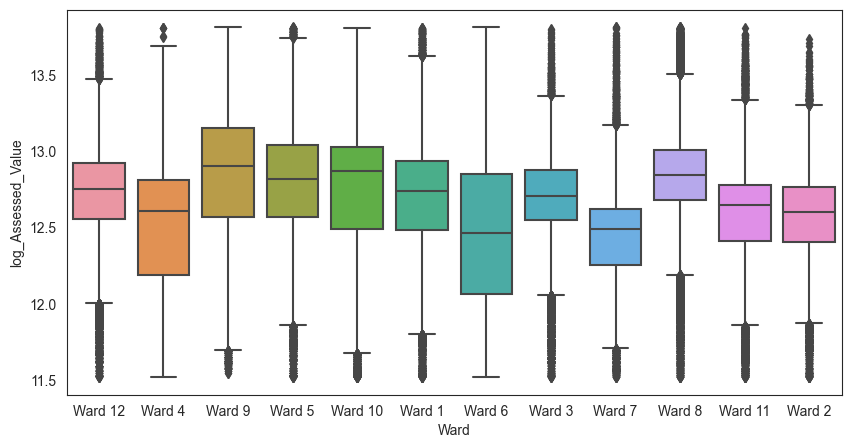

In [208]:
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
  
sns.boxplot(x = 'Ward', y = 'log_Assessed_Value', data = dfpropw4)
plt.savefig("Chart1.png")

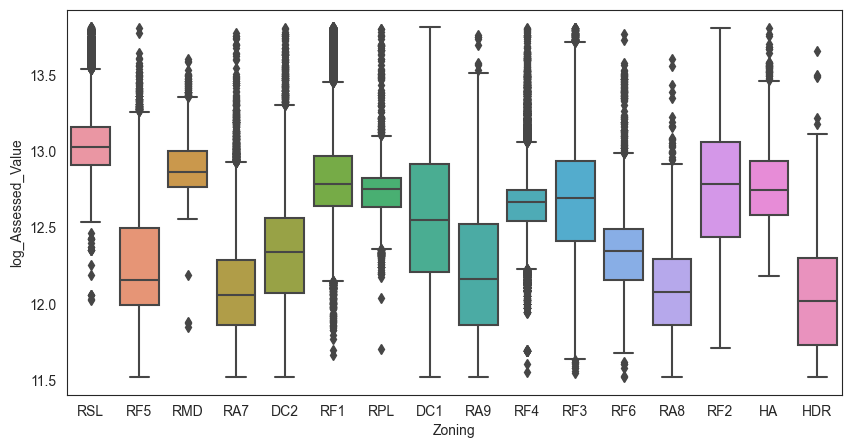

In [206]:
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
  
sns.boxplot(x = 'Zoning', y = 'log_Assessed_Value', data = dfpropw4)
plt.savefig("Chart2.png")

In [219]:
dfward8 = dfpropw4[dfpropw4["Ward"] =='Ward 8']

In [220]:
# removing count that is just 1
dfward8=dfward8[dfward8.groupby('Neighbourhood')['Neighbourhood'].transform('count')>1].copy()

In [221]:
model2 = smf.ols('Assessed_Value  ~ C(Neighbourhood) + Lot_Size +Age_Property + C(Garage)', data=dfward8)
results1 = model2.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Assessed_Value   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2466.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:26:53   Log-Likelihood:            -2.6066e+05
No. Observations:               20409   AIC:                         5.214e+05
Df Residuals:                   20388   BIC:                         5.215e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            4.152e+05   3432.083    120.986      0.000    4.09e+05    4.22e+05
C(Neighbourhood)[T.BONNIE DOON]     -1.268e+05   3711.159    -34.166      0.000   -1.34e+05    -1.2e+05
C(Neighbourhood)[T.CAPILANO]        -2.092e+05   4035.570    -51.838      0.000   -2.17e+05   -2.01e+05
C(Neighbourhood)[T.CLOVERDALE]      -5.743e+04   5168.761    -11.110      0.000   -6.76e+04   -4.73e+04
C(Neighbourhood)[T.FOREST HEIGHTS]  -1.836e+05   3771.378    -48.690      0.000   -1.91e+05   -1.76e+05
C(Neighbourhood)[T.FULTON PLACE]     -2.42e+05   4158.793    -58.195      0.000    -2.5e+05   -2.34e+05
C(Neighbourhood)[T.GARNEAU]          -1.07e+04   3776.464     -2.834      0.005   -1.81e+04   -3300.977
C(Neighbourhood)[T.GOLD BAR]        -2.471e+05   4214.171    -58.630      0.000   -2.55e+05   -2.39e+05
C(Neighbourhood)[T.HOLYROOD]        -2.323e+05   4057.383    -57.260      0.000    -2.4e+05   -2.24e+05
C(Neighbourhood)[T.IDYLWYLDE]       -2.185e+05   4470.411    -48.867      0.000   -2.27e+05    -2.1e+05
C(Neighbourhood)[T.KENILWORTH]       -2.61e+05   4100.455    -63.647      0.000   -2.69e+05   -2.53e+05
C(Neighbourhood)[T.MCKERNAN]        -6.867e+04   4160.843    -16.504      0.000   -7.68e+04   -6.05e+04
C(Neighbourhood)[T.OTTEWELL]        -2.452e+05   3546.470    -69.139      0.000   -2.52e+05   -2.38e+05
C(Neighbourhood)[T.QUEEN ALEXANDRA] -1.157e+05   3828.189    -30.228      0.000   -1.23e+05   -1.08e+05
C(Neighbourhood)[T.STRATHCONA]      -3.626e+04   3597.005    -10.080      0.000   -4.33e+04   -2.92e+04
C(Neighbourhood)[T.STRATHEARN]      -1.555e+05   4581.238    -33.949      0.000   -1.65e+05   -1.47e+05
C(Neighbourhood)[T.TERRACE HEIGHTS] -2.319e+05   4646.908    -49.898      0.000   -2.41e+05   -2.23e+05
C(Neighbourhood)[T.WINDSOR PARK]     1.569e+05   6773.185     23.158      0.000    1.44e+05     1.7e+05
C(Garage)[T.Y]                       1.167e+05   2209.047     52.833      0.000    1.12e+05    1.21e+05
Lot_Size                              542.0752      5.299    102.303      0.000     531.689     552.461
Age_Property                        -3553.9028     32.747   -108.525      0.000   -3618.090   -3489.716
==============================================================================
Omnibus:                     5292.553   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17589.819
Skew:                           1.304   Prob(JB):                         0.00
Kurtosis:                       6.725   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

In [226]:
beginningtex2 = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex2 = "\end{document}"

f = open('myreg2.tex', 'w')
f.write(beginningtex2)
f.write(results1.summary().as_latex())
f.write(endtex2)
f.close()

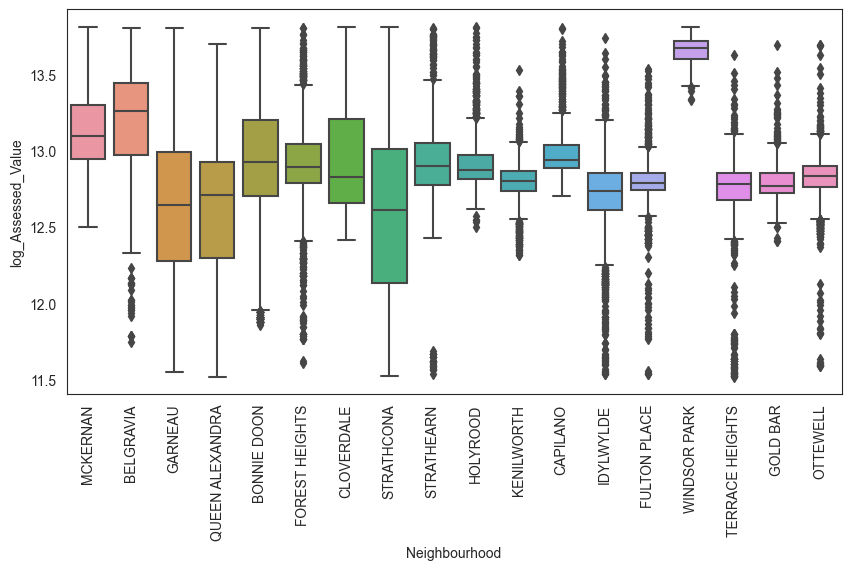

In [222]:
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
  
ax = sns.boxplot(x = 'Neighbourhood', y = 'log_Assessed_Value', data = dfward8)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig("Chart3.png")

In [223]:
dfward6 = dfpropw4[dfpropw4["Ward"] =='Ward 6']

In [224]:
model3 = smf.ols('Assessed_Value  ~ C(Neighbourhood) + Lot_Size +Age_Property + C(Garage)', data=dfward6)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Assessed_Value   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1978.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:51:25   Log-Likelihood:            -2.5446e+05
No. Observations:               19550   AIC:                         5.090e+05
Df Residuals:                   19534   BIC:                         5.091e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2.386e+05   4350.476     54.851      0.000     2.3e+05    2.47e+05
C(Neighbourhood)[T.CENTRAL MCDOUGALL] -8.511e+04   6411.781    -13.274      0.000   -9.77e+04   -7.25e+04
C(Neighbourhood)[T.DOWNTOWN]           1.143e+05   4668.293     24.488      0.000    1.05e+05    1.23e+05
C(Neighbourhood)[T.GLENORA]            1.295e+05   5612.283     23.083      0.000    1.19e+05    1.41e+05
C(Neighbourhood)[T.GROVENOR]          -3.272e+04   5893.149     -5.553      0.000   -4.43e+04   -2.12e+04
C(Neighbourhood)[T.MCCAULEY]          -3.642e+04   5994.922     -6.075      0.000   -4.82e+04   -2.47e+04
C(Neighbourhood)[T.MCQUEEN]           -7.864e+04   7186.987    -10.942      0.000   -9.27e+04   -6.46e+04
C(Neighbourhood)[T.NORTH GLENORA]     -5.133e+04   6414.950     -8.002      0.000   -6.39e+04   -3.88e+04
C(Neighbourhood)[T.OLIVER]             7.812e+04   4456.657     17.528      0.000    6.94e+04    8.69e+04
C(Neighbourhood)[T.QUEEN MARY PARK]    -3.37e+04   5058.917     -6.662      0.000   -4.36e+04   -2.38e+04
C(Neighbourhood)[T.RIVERDALE]          8.226e+04   5837.312     14.092      0.000    7.08e+04    9.37e+04
C(Neighbourhood)[T.ROSSDALE]           1.491e+05   7381.048     20.199      0.000    1.35e+05    1.64e+05
C(Neighbourhood)[T.WESTMOUNT]          6.536e+04   4940.128     13.231      0.000    5.57e+04     7.5e+04
C(Garage)[T.Y]                         1.111e+05   3557.966     31.215      0.000    1.04e+05    1.18e+05
Lot_Size                                459.7867      7.405     62.094      0.000     445.273     474.301
Age_Property                          -2643.8404     36.279    -72.875      0.000   -2714.951   -2572.730
==============================================================================
Omnibus:                     7078.552   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29768.030
Skew:                           1.758   Prob(JB):                         0.00
Kurtosis:                       7.918   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [225]:
beginningtex3 = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex3 = "\end{document}"

f = open('myreg3.tex', 'w')
f.write(beginningtex3)
f.write(results3.summary().as_latex())
f.write(endtex3)
f.close()